In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D, MaxPool2D, ZeroPadding2D

In [2]:
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [5]:
train_data.fillna(method='ffill', inplace=True)

In [6]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [10]:
imag = []
for i in range(0,7049):
    img = train_data['Image'] [i].split(' ')
    img = ['0' if x == ' ' else x for x in img]
    imag.append(img)

In [11]:
image_list = np.array(imag, dtype='float')
X_train = image_list.reshape(-1, 96, 96, 1)

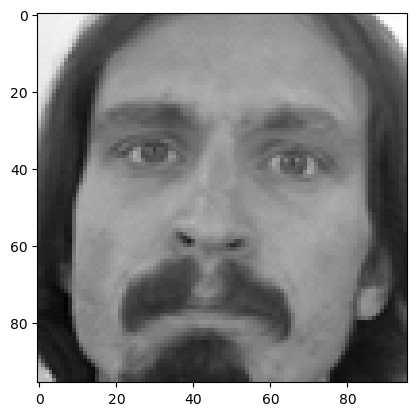

In [12]:
plt.imshow(X_train[0].reshape(96,96), cmap='gray')
plt.show()

In [13]:
training = train_data.drop('Image', axis=1)

y_train = []
for i in range(0, 7049):
    y = training.iloc[i,:]

    y_train.append(y)

y_train = np.array(y_train, dtype='float')

In [14]:
model = Sequential([Flatten(input_shape=(96,96)),
        Dense(128, activation='relu'),
        Dropout(0.1),
        Dense(64, activation='relu'),
        Dense(30)
])

2022-12-30 21:06:18.724678: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model = Sequential()
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha =0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Convolution2D(256, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha =0.1))
model.add(BatchNormalization())


model.add(Convolution2D(256, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        288       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                      

In [19]:
model.compile(
    optimizer='adam',
    loss = 'mean_squared_error',
    metrics=['mae']
)

In [20]:
model.fit(X_train, y_train, epochs=50 , batch_size=256, validation_split=0.2)

Epoch 1/50
23/23 [==============================] - 211s 9s/step - loss: 289.3515 - mae: 10.8011 - val_loss: 1066.4833 - val_mae: 30.3854
Epoch 2/50
10/23 [============>.................] - ETA: 2:00 - loss: 39.9863 - mae: 4.9712

KeyboardInterrupt: 

In [21]:
# Prepraring test data
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]

    timag.append(timg)

In [22]:
timag_list = np.array(timag, dtype='float')
X_test =  timag_list.reshape(-1,96,96,1)

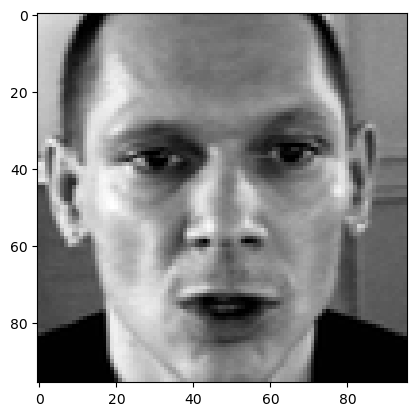

In [30]:
plt.imshow(X_test[2].reshape(96,96), cmap='gray')
plt.show()

In [31]:
pred = model.predict(X_test)


56/56 [==============================] - 14s 255ms/step


In [34]:
print(pred)

[[35.72131  17.67447  15.479612 ... 35.98299  23.165695 42.022526]
 [34.24143  14.905251 15.062139 ... 35.895615 23.79087  37.10722 ]
 [38.036022 15.915674 15.647409 ... 37.787544 24.138523 42.62483 ]
 ...
 [31.576138 17.063965 12.867865 ... 37.146282 22.535992 35.3102  ]
 [38.84124  18.111155 16.328081 ... 46.45138  24.768295 38.934254]
 [31.174091 15.754586 14.071484 ... 37.87978  22.533651 36.37516 ]]
